In [ ]:
#Importing Libraries

In [36]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [6]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [37]:
#Extract Filenames from Folder

In [38]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [39]:
len(filenames)

3873

In [40]:
#Importing ResNet50 Model and Cofiguration

In [41]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])

In [42]:
model.summary()

ValueError: Undefined shapes are not supported.

In [43]:
#Extracting Fetaures from Image

In [44]:
img = image.load_img('10008.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([0.        , 0.09545276, 0.01153319, ..., 0.00073009, 0.04513267,
       0.07661068], dtype=float32)

In [45]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [46]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


array([0.        , 0.01761619, 0.00171607, ..., 0.01247238, 0.027264  ,
       0.06899219], dtype=float32)

In [47]:
image_features = []
for file in filenames[0:5]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


[array([0.        , 0.01761619, 0.00171607, ..., 0.01247238, 0.027264  ,
        0.06899219], dtype=float32),
 array([0.        , 0.03648943, 0.        , ..., 0.00997913, 0.02375534,
        0.04649905], dtype=float32),
 array([0.        , 0.03507716, 0.00732278, ..., 0.0028351 , 0.        ,
        0.05435883], dtype=float32),
 array([0.00232166, 0.0503055 , 0.00747742, ..., 0.00346686, 0.03391019,
        0.04565743], dtype=float32),
 array([0.00306835, 0.06240452, 0.        , ..., 0.00170624, 0.02032885,
        0.05833261], dtype=float32)]

In [48]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [49]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [50]:
#Loading Pickle Files

In [51]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [52]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [53]:
np.array(Image_features).shape

(5, 2048)

In [54]:
#Finidng Simialar Images

In [55]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [56]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [57]:
input_image = extract_features_from_images('16871.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


In [58]:
distance,indices = neighbors.kneighbors([input_image])

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 5, n_neighbors = 6

In [61]:
indices[0]

NameError: name 'indices' is not defined

In [62]:
from IPython.display import Image

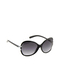

In [63]:
Image('16871.jpg')

In [59]:
Image(filenames[indices[0][1]])

NameError: name 'indices' is not defined

In [60]:
Image(filenames[indices[0][2]])

NameError: name 'indices' is not defined

In [ ]:
Image(filenames[indices[0][3]])

In [ ]:
Image(filenames[indices[0][4]])

In [ ]:
Image(filenames[indices[0][5]])